In [1]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

In [2]:

import numpy
import matplotlib.pyplot as plt


from pydrever.visualization import (
    plot_damage_levels,
    plot_hydrodynamic_conditions,
    plot_development_per_location,
)

import pydrever.data as data
from pydrever.calculation import Dikernel


Define the dike profile and roughnesses

In [3]:
x_positions = [0.0, 25.0, 35.0, 41.0, 45, 50, 60, 70]
z_positions = [-3, 0.0, 1.5, 1.7, 3.0, 3.1, 0, -1]
roughnesses = [1, 1, 0.75, 0.5, 0.8, 0.8, 0.8]
dike_schematization = data.DikeSchematization(
    dike_orientation=90.0, 
    x_positions=x_positions, 
    z_positions=z_positions, 
    roughnesses=roughnesses, 
    x_outer_toe=25.0, 
    x_outer_crest=45.0
)

Specify hydrodynamic conditions

In [4]:
time_steps = [0.0, 25000.0, 50000.0, 75000.0, 100000.0, 126000.0]
water_levels = [1.2, 1.9, 2.8, 2.7, 2.0]
wave_heights = [0.5, 0.9, 1.2, 1.1, 0.8]
wave_periods = [6.0, 6.0, 6.0, 6.0, 6.0]
wave_directions = [60.0, 70.0, 80.0, 90.0, 100.0]

hydrodynamic_conditions = data.HydrodynamicConditions(
    time_steps=time_steps, 
    water_levels=water_levels, 
    wave_heights=wave_heights, 
    wave_periods=wave_periods, 
    wave_directions=wave_directions
)

Create a Dikernel input object

In [5]:
input = data.DikernelInput(dike_schematization=dike_schematization, hydrodynamic_input=hydrodynamic_conditions)

It is possible to add additional output timesteps and/or an alternative start or stop time

In [6]:

input.start_time = 0.0
output_time_steps = numpy.arange(0.0, 126000, 1000)
output_time_steps = numpy.union1d(time_steps, output_time_steps)
input.output_time_steps = output_time_steps

Define the locations where calculations should be performed

In [7]:
def create_output_location(x_position: float, grass_layer_type: data.TopLayerType):
    return data.OutputLocationSpecification(
        x_position=x_position, 
        top_layer_specification=data.GrassWaveImpactLayerSpecification(grass_layer_type))

output_locations = [41.1, 41.5, 42.0, 42.5, 43.0, 43.5, 44.0, 44.5, 44.99]
for x_location in output_locations:
    input.add_output_location(
        x_location=x_location, 
        top_layer_specification=data.GrassWaveImpactLayerSpecification(
            top_layer_type=data.TopLayerType.GrassClosedSod)
            )

Create a calculation object

In [8]:
kernel = Dikernel(input)

Now perform the calculation

In [9]:
runresult = kernel.run()

In case the calculation was not successful, print any validation messages

In [10]:
print("Run was: " + "succesfull" if runresult else "unsuccessfull")
if not runresult:
    for message in kernel.messages:
        print(message)
    quit()

Run was: succesfull


Now process and visualize the output

Number of output locations: 9
   Not failed, X: 41.1, Damage level = 0.909913579022899
   Not failed, X: 41.5, Damage level = 0.909913579022899
   Not failed, X: 42.0, Damage level = 0.0
   Not failed, X: 42.5, Damage level = 1.495518095960186
   Not failed, X: 43.0, Damage level = 5.281205409476421
   Not failed, X: 43.5, Damage level = 5.281205409476421
   Not failed, X: 44.0, Damage level = 5.281205409476421
   Not failed, X: 44.5, Damage level = 0.0
   Not failed, X: 44.99, Damage level = 0.0


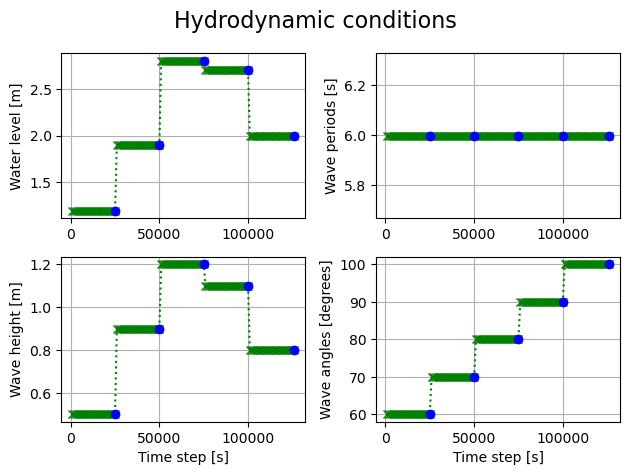

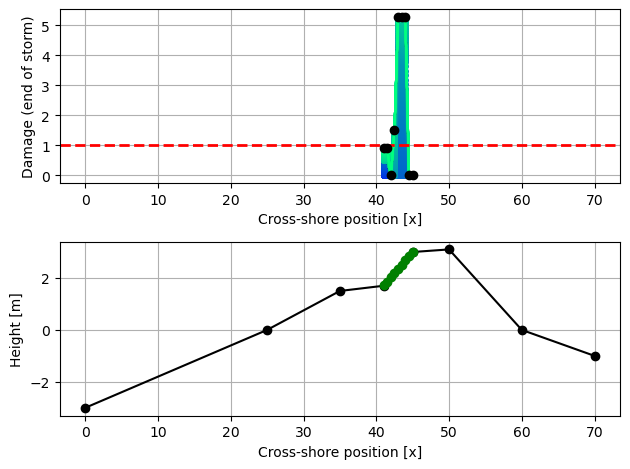

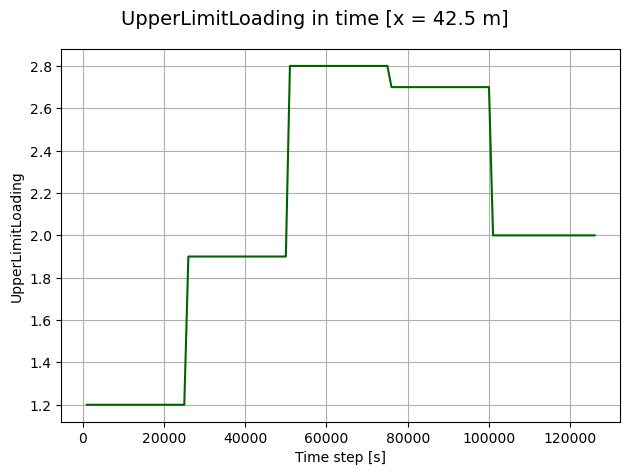

In [11]:
output = kernel.output

print("Number of output locations: " + str(len(output)))
for location in output:
    print(
        "   "
        + ("Failed" if location.failed else "Not failed")
        + ", X: "
        + str(location.x_position)
        + ", Damage level = "
        + str(location.damage_development[-1])
    )

fig = plot_hydrodynamic_conditions(input)

fig2 = plot_damage_levels(output, input)

fig3 = plot_development_per_location(
    output[3], data.TimeDependentOutputQuantity.UpperLimitLoading, input
)

plt.show()

# fig.savefig("C:/Test/testimage.png")
# fig2.savefig("C:/Test/testimage.png")